# Probability Distribution

## Uniform Distribution

In [ ]:
import numpy as np

In [ ]:
# It shows that randomly picking number from 0-9 is uniform distribution
# If you will increase instances, you will go closer to .10 per number
n = np.random.randint(0, 10, 10000)
h = np.bincount(n)
h

array([ 983, 1037,  960, 1016, 1024, 1015,  960,  986, 1019, 1000])

In [ ]:
h = h/h.sum()
h

array([0.0983, 0.1037, 0.096 , 0.1016, 0.1024, 0.1015, 0.096 , 0.0986,
       0.1019, 0.1   ])

## Binomial Distribution

# ${n \choose k} p^k(1-p)^n-^k$



In [ ]:
# As if we calculate by the formula, probability of having event occur 1 time from event happening
# from 1 to 5 trials if individually event has probability .3
t = np.random.binomial(5, 0.3, size=1000)
s = np.bincount(t)
s

array([164, 352, 293, 158,  28,   5])

In [ ]:
s = s / s.sum()
s

array([0.164, 0.352, 0.293, 0.158, 0.028, 0.005])

In [ ]:
s.sum()

1.0

## Bernolli Distribution

In [ ]:
# Total trial is one. Event that may occur is one too. Use this only when likelihood is changed with pre-condition
t = np.random.binomial(1, 0.5, size=1000)
np.bincount(t)

array([503, 497])

In [ ]:
t = np.random.binomial(1, 0.3, size=1000)
np.bincount(t)

array([723, 277])

In [ ]:
277/1000

0.277

## Poison Distribution

### $P(k) = \frac {(λ)^k (e)^-λ}{k!}$


In [ ]:
import numpy as np

In [ ]:
# if we have average 5 events in a time. What is the probability of different events
t = np.random.poisson(5, size=1000)
s = np.bincount(t)
s

array([  8,  28,  91, 150, 168, 157, 149,  96,  74,  46,  19,   8,   2,
         2,   1,   1])

## Arbitraty Distribution

In [ ]:
!pip install fldr==1.4.4

In [ ]:
from fldr import fldr_preprocess_float_c
from fldr import fldr_sample

In [ ]:
x = fldr_preprocess_float_c([0.6, 0.2, 0.1, 0.1])
t = [fldr_sample(x) for i in range(1000)]
np.bincount(t)

array([577, 223, 104,  96])

In [ ]:
# Face of the racoon against fldr distribution
from scipy.misc import face
im = face(True)
b = np.bincount(im.ravel(), minlength=256)
b = b/b.sum()
x = fldr_preprocess_float_c(list(b))
t = [fldr_sample(x) for i in range(25000)]
q = np.bincount(t, minlength=256)
q = q/q.sum()

<ipython-input-6-dabd0de75c50>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = face(True)


In [ ]:
import matplotlib.pyplot as plt

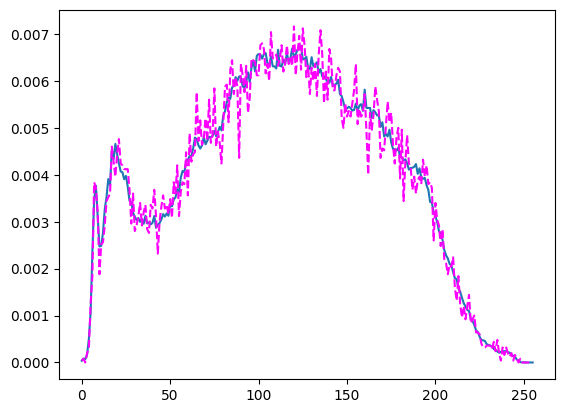

In [ ]:
plt.plot(b, label="sample")
plt.plot(q, color='magenta', label="probability", linestyle="dashed")
plt.show()

## Continous Probability Distribution Functions

In [ ]:
N = 10000000
B = 100
t = np.random.random(N)
u = np.histogram(t, bins=B)[0]
u = u/u.sum()
t = np.random.normal(0, 1, size=N)
n = np.histogram(t, bins=B)[0]
n = n/n.sum()
t = np.random.gamma(5.0, size=N)
g = np.histogram(t, bins=B)[0]
g = g/g.sum()
t = np.random.beta(5, 2, size=N)
b = np.histogram(t, bins=B)[0]
b = b/b.sum()

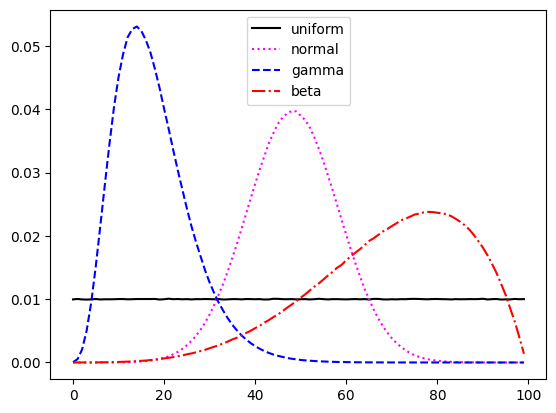

In [ ]:
plt.plot(u, color="black", label="uniform")
plt.plot(n, color='magenta', label="normal", linestyle="dotted")
plt.plot(g, color='blue', label="gamma", linestyle="dashed")
plt.plot(b, color='red', label="beta", linestyle="dashdot")
leg = plt.legend(loc='upper center')
plt.show()

## Central Limit Theorm

In [ ]:
M = 10000
m = np.zeros(M)
for i in range(M):
  t = np.random.beta(5, 2, size=M)
  m[i] = t.mean()

In [ ]:
import matplotlib.pyplot as plt

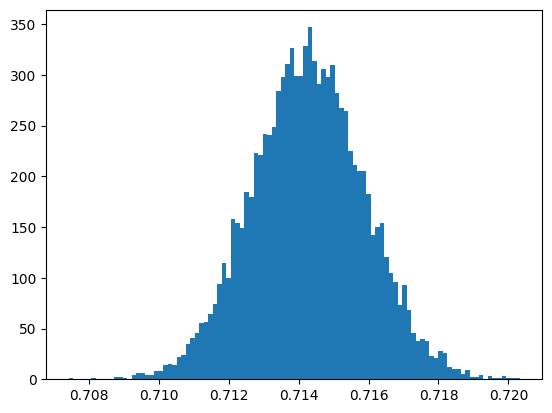

In [ ]:
plt.hist(m, bins=100)
plt.show()

In [ ]:
from fldr import fldr_preprocess_float_c
from fldr import fldr_sample
z  = fldr_preprocess_float_c([0.1, 0.6, 0.1, 0.1, 0.1])
m = np.zeros(M)
for i in range(M):
  t = np.array([fldr_sample(z) for i in range(M)])
  m[i] = t.mean()


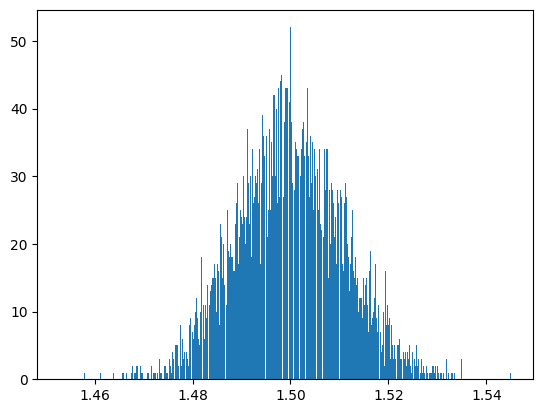

In [ ]:
plt.hist(m, bins=1000)
plt.show()

## The Law of Large Numbers

In [ ]:
m = []
for n in np.linspace(1, 8, 30):
  t = np.random.normal(1, 1, size=int(10**n))
  m.append(t.mean())


In [ ]:
len(m)

30

In [ ]:
x_ticks = []
for i in range(10):
  x_ticks.append(i)

print(x_ticks)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
x = []
for i in range(30):
  x.append(i)

print(len(x))
print(x)

30
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


[]

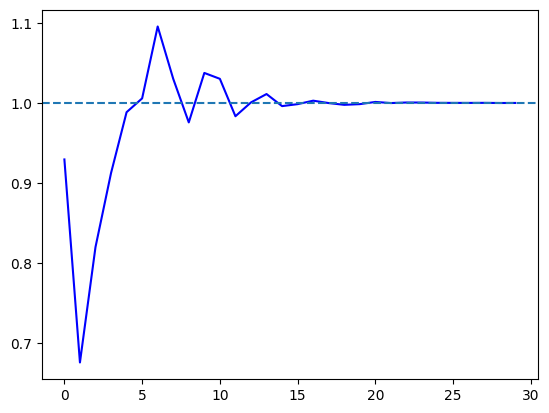

In [ ]:
plt.plot(x, m, color='blue')
plt.axhline(y = 1.0, linestyle = 'dashed')
plt.plot()